In [147]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical

### Moons

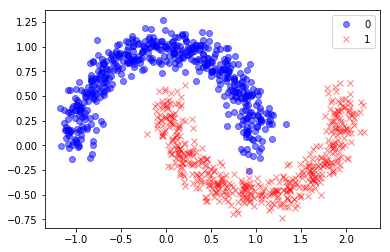

In [56]:
X, y = datasets.make_moons(n_samples = 1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size=0.3,
                                                random_state=42)

In [49]:
K.clear_session()

model = Sequential()
model.add(Dense(5, kernel_initializer='he_normal',activation='relu'))
model.add(Dense(4, kernel_initializer='he_normal',activation='relu'))
model.add(Dense(3, kernel_initializer='he_normal',activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(SGD(lr=0.1), 'binary_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(X_train, y_train, batch_size=64, epochs=400, verbose=0)

In [51]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 139us/step


In [52]:
print('Loss: {:0.5f}, Accuracy: {:0.2f}'.format(results[0], results[1]))

Loss: 0.00698, Accuracy: 1.00


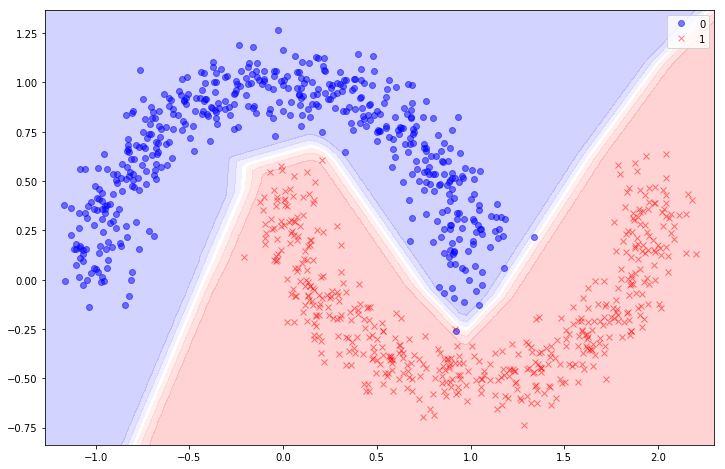

In [53]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np. meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

plot_decision_boundary(model, X, y)

### Wine

In [ ]:
wine = datasets.load_wine(True)

In [100]:
df_X = pd.DataFrame(wine[0])
df_y = pd.DataFrame(wine[1])
df = pd.concat([df_X, df_y], axis=1)
df.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'Class']
df.columns.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'Class'], dtype=object)

In [101]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [106]:
X = wine[0]
y = wine[1]

In [107]:
sc = preprocessing.StandardScaler()
Xs = sc.fit_transform(X)
y_cat = to_categorical(y)

(178, 13) (178, 3)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y_cat, test_size=0.2)

C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

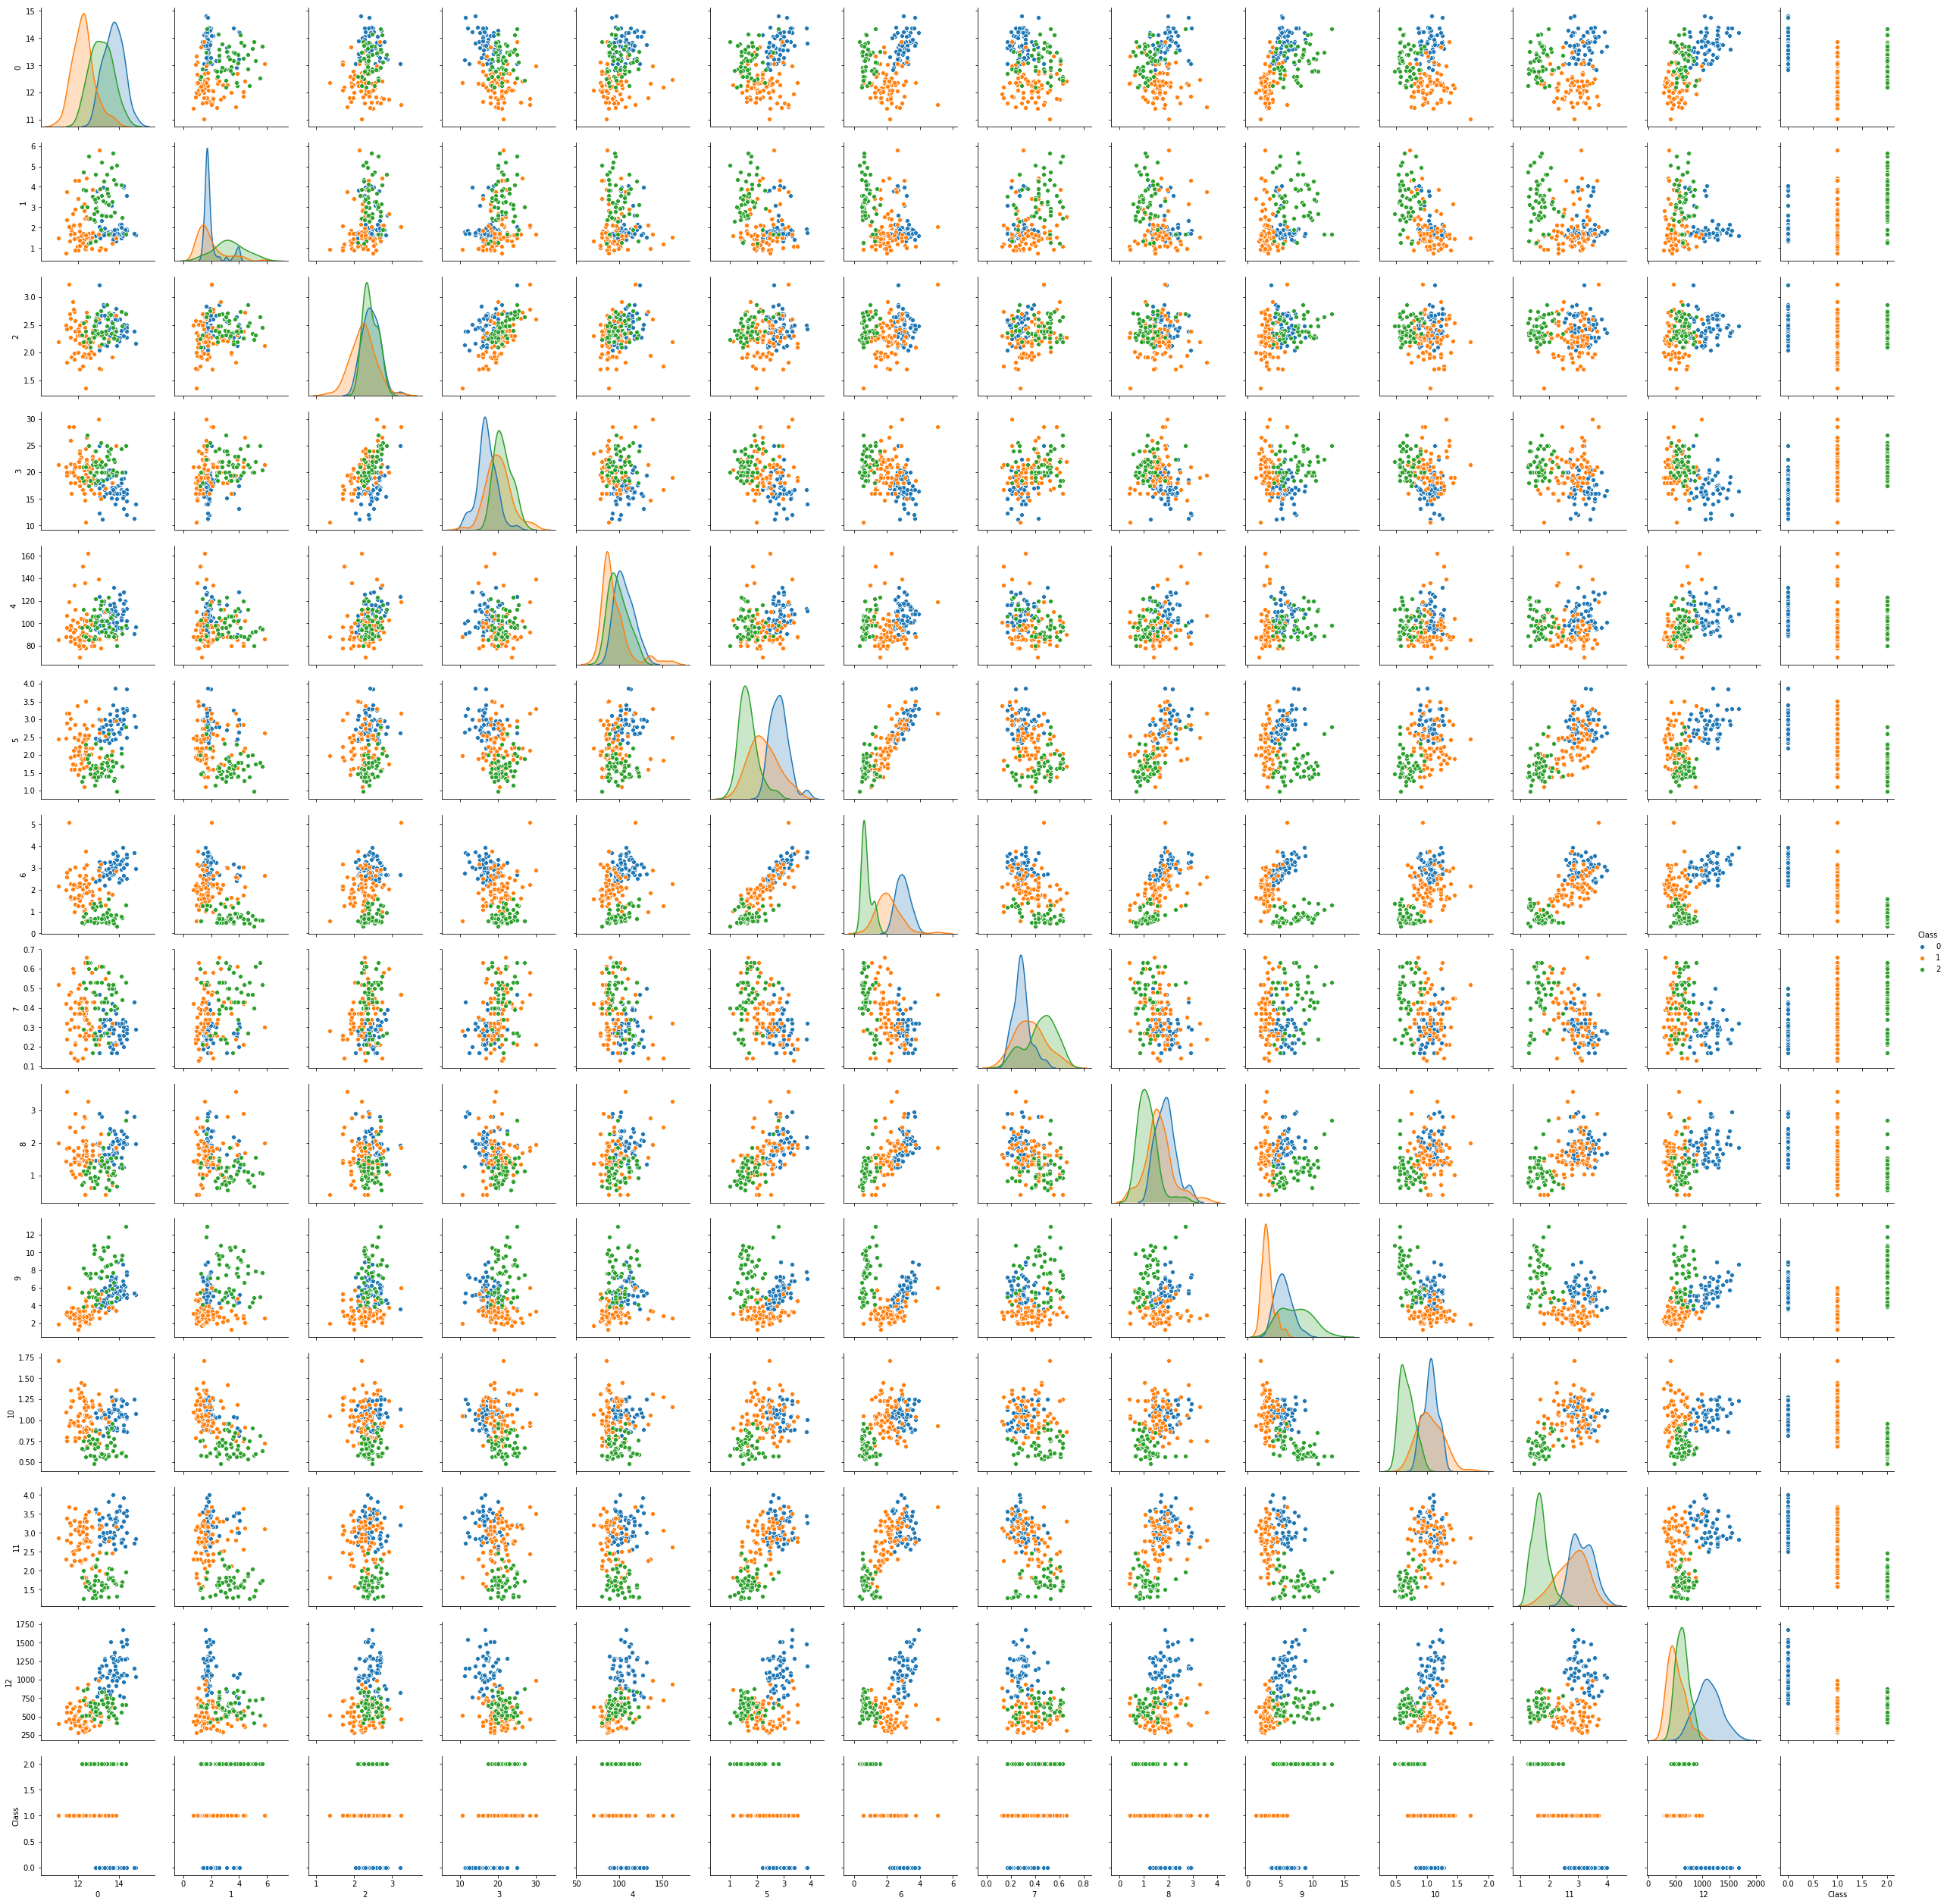

In [102]:
sns.pairplot(df, hue='Class')

In [122]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(13, ), 
                kernel_initializer='he_normal',
                activation='softmax'))

model.compile(Adam(lr=0.3), 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=8, epochs=10, verbose=1, validation_split=0.2)


Train on 113 samples, validate on 29 samples
Epoch 1/10
113/113 [==============================] - 0s 2ms/step - loss: 0.4827 - acc: 0.8496 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 2/10
113/113 [==============================] - 0s 171us/step - loss: 0.0135 - acc: 0.9912 - val_loss: 0.0165 - val_acc: 1.0000
Epoch 3/10
113/113 [==============================] - 0s 180us/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 4/10
113/113 [==============================] - 0s 175us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 5/10
113/113 [==============================] - 0s 206us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 7.6256e-04 - val_acc: 1.0000
Epoch 6/10
113/113 [==============================] - 0s 197us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 8.0177e-04 - val_acc: 1.0000
Epoch 7/10
113/113 [==============================] - 0s 202us/step - loss: 9.8344e-04 - acc: 1.0000 - val_loss: 6.0950e-04 - val_acc: 1.0000
Epo

In [120]:
model.evaluate(X_train, y_train)

142/142 [==============================] - 0s 28us/step


[0.0006066224960820146, 1.0]

In [121]:
model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 54us/step


[0.2686012188593547, 0.9722222222222222]

### Iris Dataset

In [125]:
iris = datasets.load_iris(True)

In [132]:
df_X = pd.DataFrame(iris[0])
df_y = pd.DataFrame(iris[1])
df = pd.concat([df_X, df_y], axis=1)
df.columns = ['sepal_length', 'sepal_width', 'petal_length',
             'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

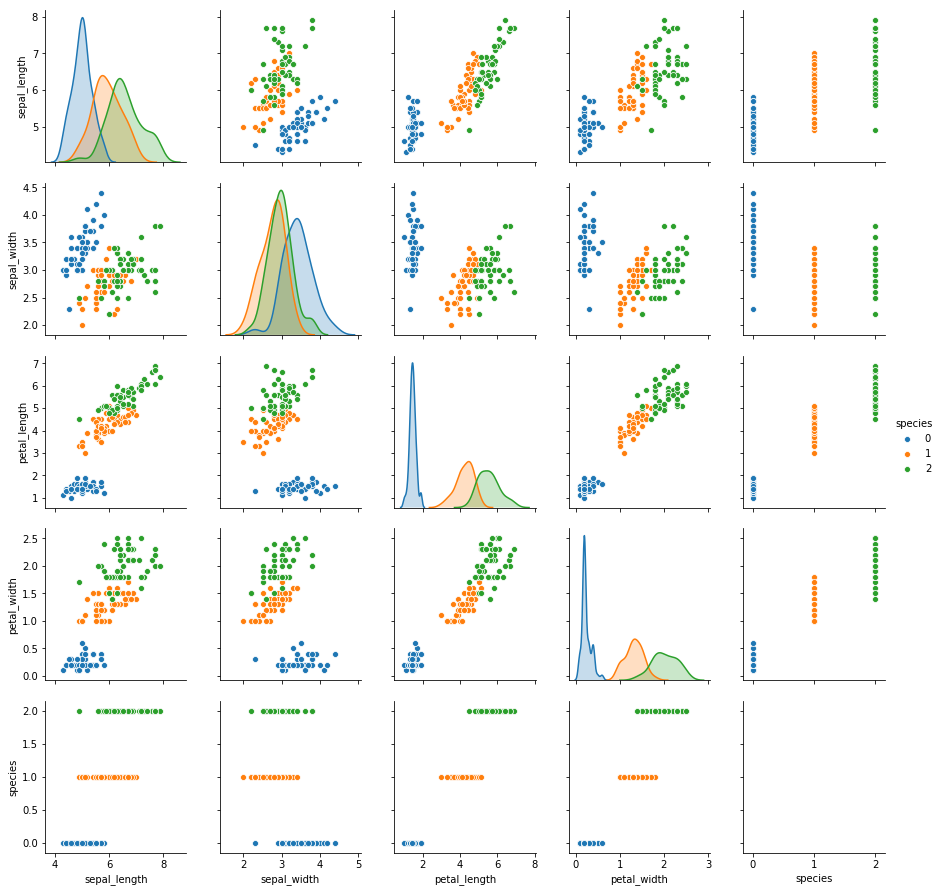

In [133]:
sns.pairplot(df, hue='species')

In [149]:
X = sc.fit_transform(df.drop('species', axis=1))
y = df['species'].values
y_cat = to_categorical(y)
print('X.shape', X.shape, 'y_cat.shape', y_cat.shape)

X.shape (150, 4) y_cat.shape (150, 3)


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                   test_size=0.2)

In [151]:
K.clear_session()

inputs = Input(shape=(4, ))
x = Dense(3, kernel_initializer='he_normal', activation='relu')(inputs)
x = Dense(5, kernel_initializer='he_normal', activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(Adam(lr=0.1),
             'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=8, epochs=30, verbose=1)



Epoch 1/30
120/120 [==============================] - 0s 3ms/step - loss: 0.5844 - acc: 0.7250
Epoch 2/30
120/120 [==============================] - 0s 364us/step - loss: 0.2607 - acc: 0.8917
Epoch 3/30
120/120 [==============================] - 0s 277us/step - loss: 0.1650 - acc: 0.9417
Epoch 4/30
120/120 [==============================] - 0s 302us/step - loss: 0.0842 - acc: 0.9667
Epoch 5/30
120/120 [==============================] - 0s 293us/step - loss: 0.1620 - acc: 0.9417
Epoch 6/30
120/120 [==============================] - 0s 182us/step - loss: 0.1009 - acc: 0.9500
Epoch 7/30
120/120 [==============================] - 0s 182us/step - loss: 0.1478 - acc: 0.9333
Epoch 8/30
120/120 [==============================] - 0s 190us/step - loss: 0.1026 - acc: 0.9750
Epoch 9/30
120/120 [==============================] - 0s 207us/step - loss: 0.1286 - acc: 0.9583
Epoch 10/30
120/120 [==============================] - 0s 215us/step - loss: 0.0846 - acc: 0.9667
Epoch 11/30
120/120 [==========